In [19]:
import warnings
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from src import utils, plotting
import src.stlouisfed as fred
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.float_format', '{:,.2f}'.format)

In [24]:
data_1 = fred.get_series_observation("UNRATE")
data_1.rename(columns={'lin': 'Close'}, inplace=True)
data_1.index = data_1.index.tz_localize('UTC').tz_convert('America/New_York')
data_1 = data_1[data_1.index > '2001-01-01']

In [26]:
ticker_1 = "GC=F"
ticker_2 = "^GSPC"
ticker_3 = "CL=F"
period = "23y"
stock_1 = yf.Ticker(ticker_1.upper()).history(period=period).dropna()
stock_2 = yf.Ticker(ticker_2.upper()).history(period=period).dropna()
stock_3 = yf.Ticker(ticker_3.upper()).history(period=period).dropna()

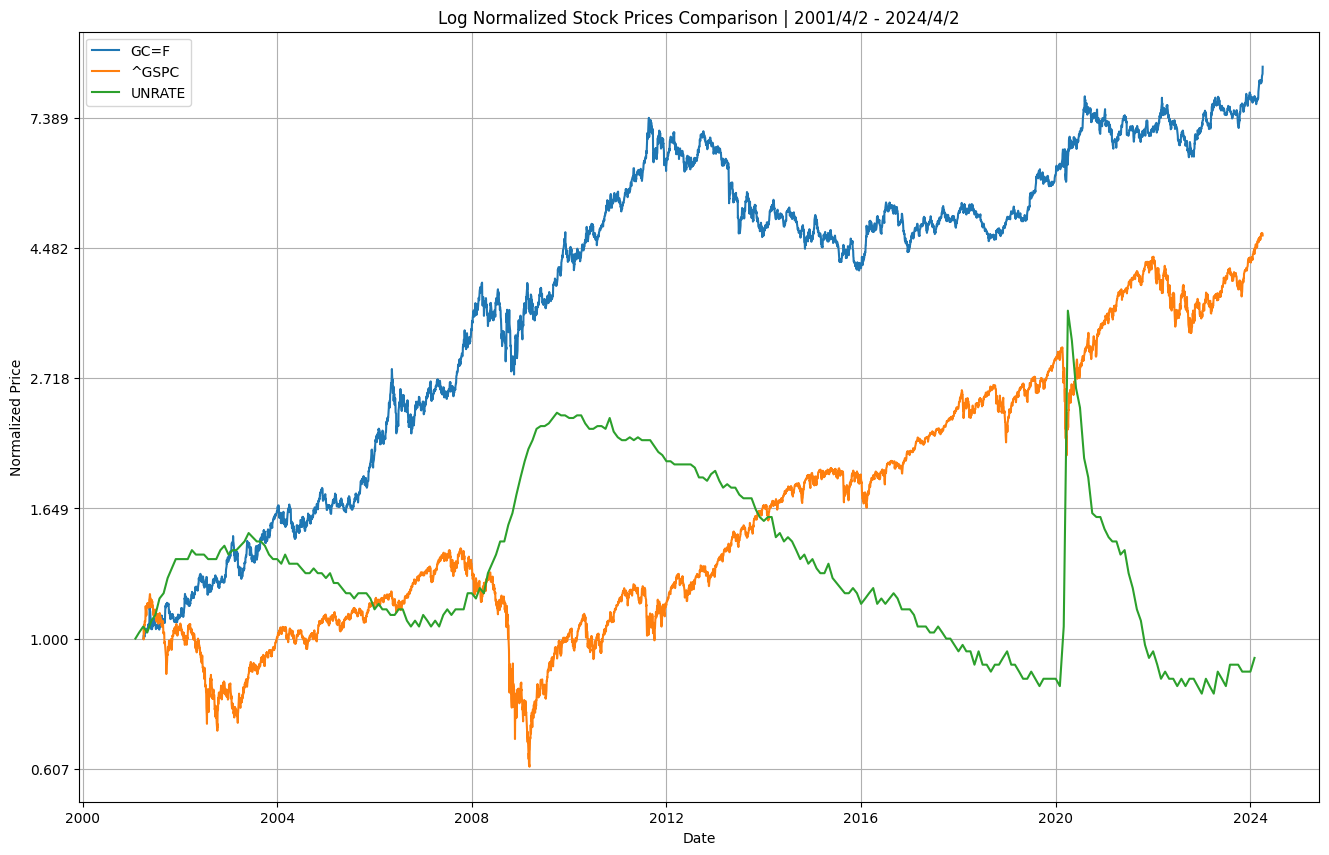

GC=F / ^GSPC correlation: 0.74901014
GC=F / UNRATE correlation:nan
^GSPC / UNRATE correlation:nan


In [27]:
plotting.plot_n_chart_comparison([(ticker_1, stock_1), (ticker_2, stock_2), ("UNRATE", data_1)], log_scale=True)

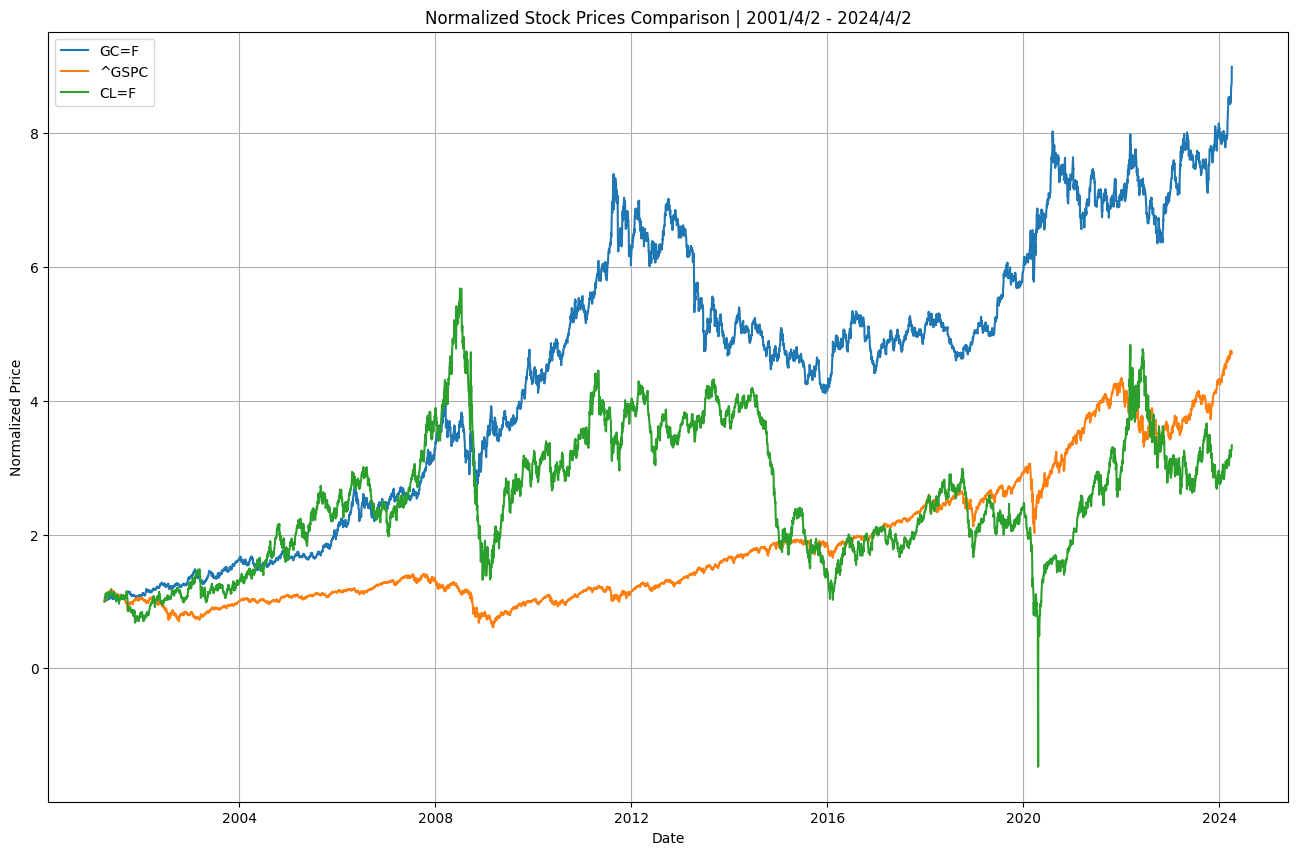

GC=F / ^GSPC correlation: 0.74901014
GC=F / CL=F correlation:  0.49842115
^GSPC / CL=F correlation: 0.15465240


In [28]:
plotting.plot_n_chart_comparison([(ticker_1, stock_1), (ticker_2, stock_2), (ticker_3, stock_3)], log_scale=False)